In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Read in the data with the read_csv() into the Pandas Dataframe
housing_df = pd.read_csv('housing.csv')

#use .info() to show the features in your dataset along with a count and datatype
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing_df.shape

(20640, 10)

In [10]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
housing_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [12]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
housing_df['total_bedrooms'].isnull().sum()/housing_df.shape[0]*100

np.float64(1.002906976744186)

In [15]:
from sklearn.impute import KNNImputer
housing_df_temp = housing_df.copy()

columns_list = [col for col in housing_df_temp.columns if housing_df_temp[col].dtype != 'object']

new_column_list = [col for col in housing_df_temp.loc[:,housing_df_temp.isnull().any()]]

housing_df_temp = housing_df_temp[new_column_list]

In [16]:
# initialize KNNImputer to impute missing data using machine learning
knn = KNNImputer(n_neighbors = 3)

# fit function trains the model 
knn.fit(housing_df_temp)

# transform the data using the model
# applies the transformation model (ie knn) to data
array_Values = knn.transform(housing_df_temp)

# convert the array values to a dataframe with the appropriate column names
housing_df_temp = pd.DataFrame(array_Values, columns = new_column_list)

In [17]:
# confirm there are no columns with missing values
housing_df_temp.isnull().sum()

total_bedrooms    0
dtype: int64

In [18]:
# overlay the imputed column over the old column with missing values

# loop through the list of columns and overlay each one
for column_name in new_column_list:
    housing_df[column_name] = housing_df_temp.replace(housing_df[column_name],housing_df[column_name])

# confirm columns no longer contain null data
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Text(0.5, 0, 'House Values')

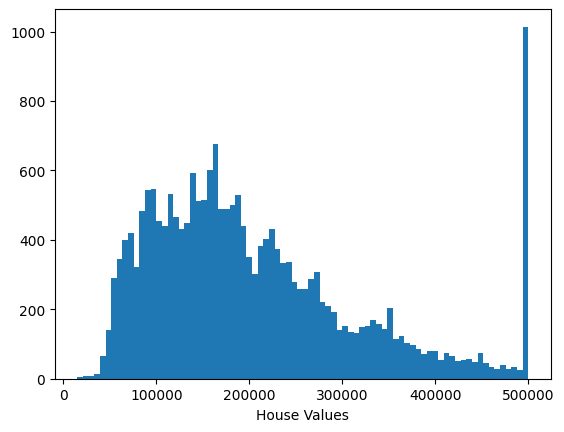

In [21]:
# Plot the distribution of the target variable (median_house_value) using a histogram

# bins->amount of columns
plt.hist(housing_df['median_house_value'], bins=80)
plt.xlabel("House Values")


# We can see from the plot that the values of Median House Value are distributed normally with few outliers. 
# Most of the house are around 100,000-200,000 range

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

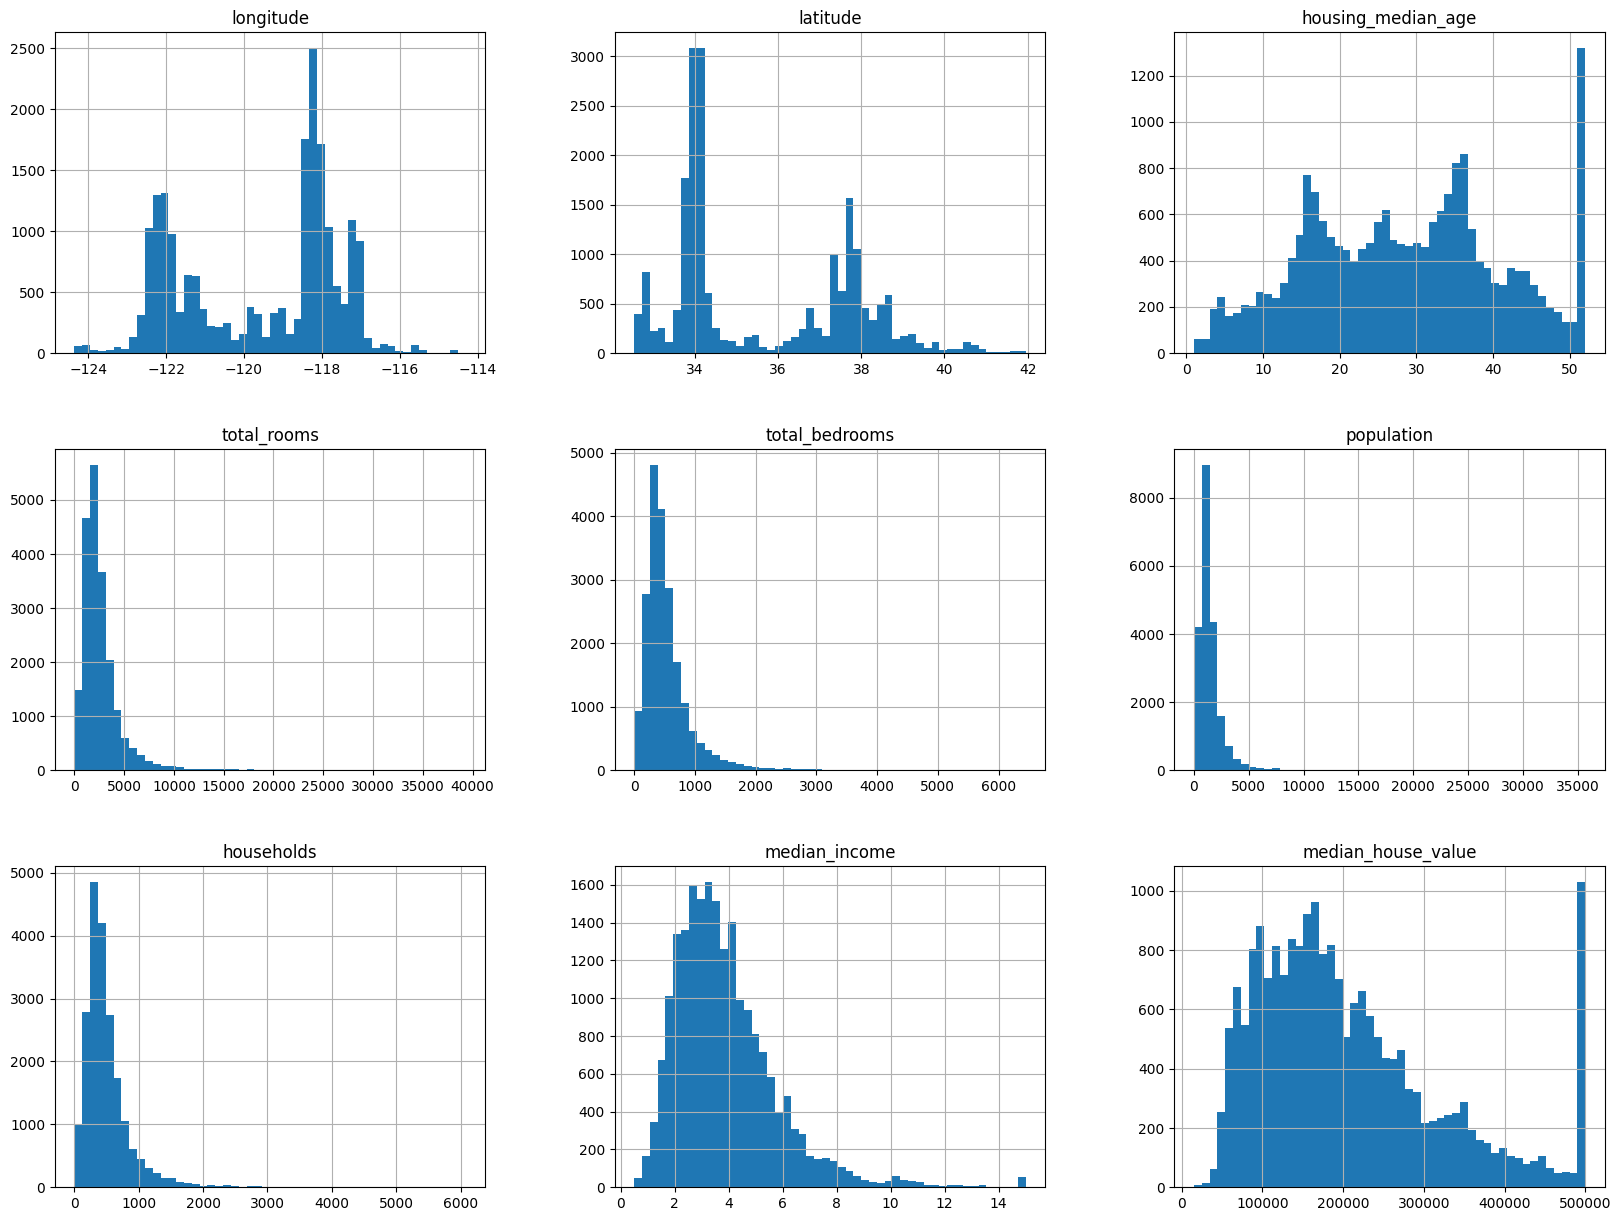

In [22]:
# let's do histograms for the all the features to understand the data distributions
# using housing_df as to not plot the encoded values for OCEAN_PROXIMITY 
housing_df.hist(bins=50, figsize=(20,15))

### Using a heatmap to show correlation

In [23]:
# Plot a graphical correlation matrix for each pair of columns in the dataframe
corr = housing_df.corr(numeric_only=True) # data frame correlation function
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069260 -0.066658           -0.318998     0.927253   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069260    0.099773    0.055310      -0.015176   
latitude                 -0.066658   -0.108785   -0.071035      -0.079809   
housing_

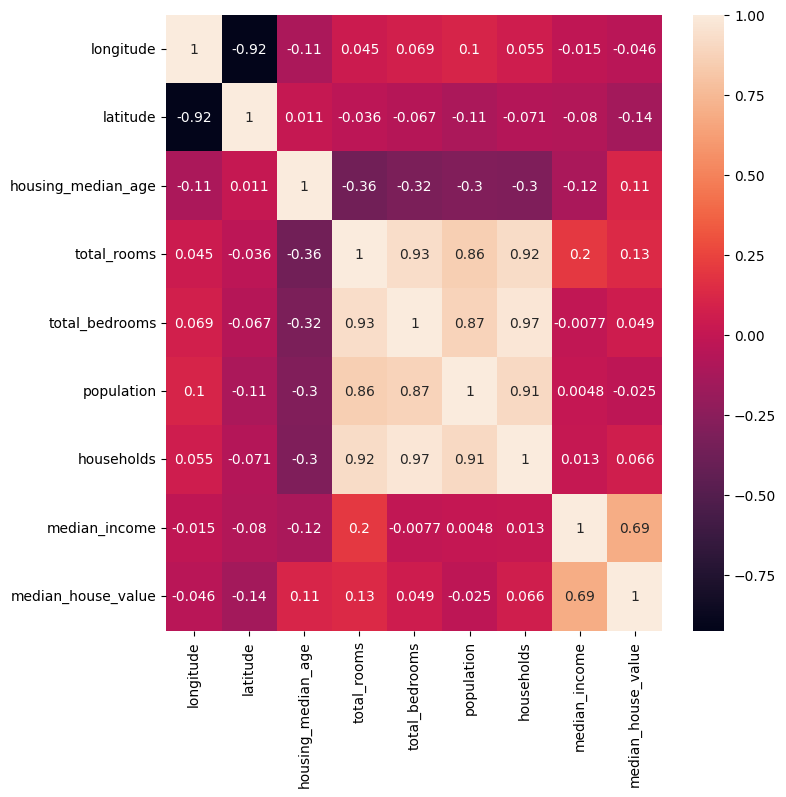

In [26]:
# make the heatmap larger in size
plt.figure(figsize = (8,8))

sns.heatmap(corr, annot=True)
plt.show()

### Feature Engineering

In [27]:
# Additionally we noted that several features (total_rooms,total_bedrooms,population,households) have very high correlation to one another, 
# so it's interesting to find out if a removal of a few of them would have any affect on the model performance

#  a new feature that is a ratio of the total rooms to households
housing_df['rooms_per_household'] = housing_df['total_rooms']/housing_df['households']

# a new feature that is a ratio of the total bedrooms to the total rooms 
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms']/housing_df['total_rooms']

# a new feature that is a ratio of the population to the households 
housing_df['population_per_household']= housing_df['population']/housing_df['households']

# let's combine the latitude and longitude into 1
housing_df['coords'] = housing_df['longitude']/housing_df['latitude']

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coords                    20640 non-null  float64
dtypes: flo

<details open>
<summary>Ways to handle imbalanced datasets</summary>

- Precision
    * Quantifies the number of positive predictions that belong in the positive class.
    * Precision = TP/TP+FP
    * Used when we want fewer false positives (Spam email filters)

- Recall
    * Quantifies the number of positive predictions made out of all the actual positives.
    * Recall = TP/TP+FN
    * Use recall when false positives are okay but you want less false negatives (Fraud detection in banks).

- F1 score
    * Combination of precision and recall
    * F1= 2*[Rrecision * Recall]/[Precision + Recall]
    * Use F1 for imbalanced data.

- Area under the ROC Curve
    * Measures accuracy and Visualizes how well the predictions are ranked across true positive and false positive rates.
</details>